## CART Decision Tree Algorithm

<img src="Decision_Trees.png">

> Classification and Regression Trees (CART) : Decision Tree Algorithm that can be used for classification or regression

> CART algortihm builds **Binary Decision tree**

>  CART algorithm provides a foundation for important algorithms like:
    - bagged decision trees, 
    - random forest and 
    - boosted decision trees.

> - Each root node: A input feature and a split point on that feature
- Leaf node: Output Variable 

> Creating a CART model involves:
    1. selecting input variables and 
    2. split points on those variables 

In [1]:
import pandas as pd
import numpy as np

## 1. Classification Tree

In [12]:
x0 = [5, 6, 7, 8, 9]
x1 = [50, 67, 12, 5, 19]
y = [1, 0, 1, 0, 0]
df = pd.DataFrame(np.c_[x0, x1, y], columns=['x0', 'x1', 'y'])
df

,x0,x1,y
0,5,50,1
1,6,67,0
2,7,12,1
3,8,5,0
4,9,19,0


#### STEP 1: Recursive Binary Splitting

##### Gini Impurity : in the input datset

    p(0) = 3/5 , p(1) = 2/5
    G = Impurity for set y=0 + Impurity for set y=1
    
    Impurity for set 0  = p(0) * p(1) 
                        = p(0) * (1 - p(0))
                        = 3/5 * (1 - 3/5)
                        = 0.24
    Impurity for set 1  = p(1) * p(0) 
                        = p(1) * (1 - p(0))
                        = 2/5 * (1 - 2/5)
                        = 0.24  
    Gini Impurity for input dataset(a.k.a before the split) G = 0.48     
    
NOTE: For Binary Classification problems: G = 2 * p(0) * p(1)


#####  Split points to be considered
values in the column will be sorted and only the mid-points between adjacent values will be considered for the split points

    Split points considered in x0: 5.5, 6.5 , 7.5  , 8.5 
    Split points considered in x1: 8.5, 15.5, 34.5 , 58.5


##### Weighted Gini : Weighted Average of uncertainity -> To get the large set with less uncertainity
Goal is to minimise the Wt. Gini Impurities at each split (a.k.a to maximise the Gini Gain)

    Wt. Gini impurities = (prportion of examples in left subtree * Gini Impurity in left subtree) +  (prportion of examples in right subtree * Gini Impurity in right subtree) 
    
    Gini Gain = original Gini impurity - weighted Gini impurities
    
    Higher the Gini Gain the better the split.

Example:

    Weighted Gini at x0(2) = 6.5
    G_1 = [1/2 * (1 - 1/2)] + [1/2 * (1 - 1/2)] = 0.50
    G_2 = [2/3 * (1 - 2/3)] + [1/3 * (1 - 1/3)] = 0.44
    Wt. Gini impurities =  (1/5 * .50) + (4/5 * 0.44) = 0.45
    Gini Gain = 0.48 - 0.45 = 0.03
    
    
    Weighted Gini at x0(2) = 7.5:
    G_1 = [2/3 * (1 - 2/3)] + [1/3 * (1 - 1/3)] = 0.444
    G_2 = [2/2 * (1 - 2/2)] = 0
    Wt. Gini impurities = (3/5 * 0.444) + (2/5 * 0) = 0.27
    Gini Gain = 0.48 - 0.27 = 0.21
    
    
    Weighted Gini at x0(2) = 8.5
    G_1 = [2/4 * (1 - 2/4)] + [2/4 * (1 - 2/4)] = 0.500
    G_2 = [1/1 * (1 - 1/1)] = 0
    Wt. Gini impurities = (4/5 * 0.5) + (1/5 * 0) = 0.40
    Gini Gain = 0.48 - 0.40 = 0.08
    
Similarly check for all split points in x1. Finally, we can see that the best split will be chosen 7.5 because it has the highest Gini Gain.

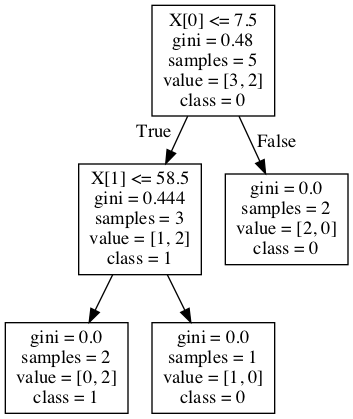

In [13]:
from sklearn import tree
from IPython.display import Image
import pydot

dt = tree.DecisionTreeClassifier(random_state=0, max_depth=3)

X = df[['x0', 'x1']]
y = df.y
dt.fit(X, y)

data_dot = tree.export_graphviz(dt, out_file=None, class_names=['0', '1'])
graph= pydot.graph_from_dot_data(data_dot)
Image(graph[0].create_png())

## 2. Regression Tree

In [14]:
x0 = [5, 6, 7, 8, 9]
x1 = [50, 67, 12, 5, 19]
y = [96, 45, 89, 12, 90]
df = pd.DataFrame(np.c_[x0, x1, y], columns=['x0', 'x1', 'y'])
df

,x0,x1,y
0,5,50,96
1,6,67,45
2,7,12,89
3,8,5,12
4,9,19,90


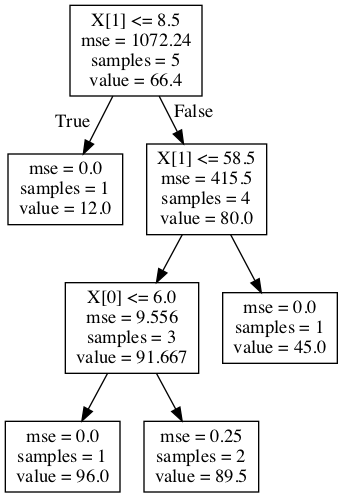

In [15]:
from sklearn import tree
from IPython.display import Image
import pydot

dt = tree.DecisionTreeRegressor(random_state=0, criterion='mse', max_depth=3)

X = df[['x0', 'x1']]
y = df.y
dt.fit(X, y)

data_dot = tree.export_graphviz(dt, out_file=None, class_names=['0', '1'])
graph= pydot.graph_from_dot_data(data_dot)
Image(graph[0].create_png())

#ignore the mse=1072.24

#(j,s) after splitting 0 + 415.5 is the min mse error. so split there.

#How to know which example goes where???

#### STEP 2: Tree Pruning